In [1]:
from os.path import join, dirname, exists
from os import makedirs
from itertools import chain, islice

from thesis_v2 import dir_dict

In [2]:
from scipy.stats import sem
import numpy as np

In [3]:
import pandas as pd

In [4]:
f_main_result = join(dir_dict['analyses'], 'tang_refactored', '20200819', 'hal_tuning.pkl')
df_main_result = pd.read_pickle(f_main_result)

In [5]:
df_main_result

hal_tuning_analysis  \
act_fn   ff_1st_bn_before_act loss_type model_seed num_layer out_channel rcnn_bl_cls readout_type train_keep                       
relu     False                mse       0          2         8           1           cm-avg       350                       None   
                                                                                                  700                       None   
                                                                                                  1400                      None   
                                                                                     cm-last      350                       None   
                                                                                                  700                       None   
...                                                                                                                          ...   
softplus True                 poisson   1          6         16          1           legacy       700                       None   
                                                                                                  1400                      None   
                                                             32          1           legacy       350                       None   
                                                                                                  700                       None   
                                                                                                  1400                      None   

                                                                                                             hal_tuning_analysis_inverted  \
act_fn   ff_1st_bn_before_act loss_type model_seed num_layer out_channel rcnn_bl_cls readout_type train_keep                                
relu     False                mse       0          2         8           1           cm-avg       350                                None   
                                                                                                  700                                None   
                                                                                                  1400                               None   
                                                                                     cm-last      350                                None   
                                                                                                  700                                None   
...                                                                                                                                   ...   
softplus True                 poisson   1          6         16          1           legacy       700                                None   
                                                                                                  1400                               None   
                                                             32          1           legacy       350                                None   
                                                                                                  700                                None   
                                                                                                  1400                               None   

                                                                                                              num_param  
act_fn   ff_1st_bn_before_act loss_type model_seed num_layer out_channel rcnn_bl_cls readout_type train_keep             
relu     False                mse       0          2         8           1           cm-avg       350             13846  
                                                                                                  700             13846  
                                                                      

In [6]:
def get_mean(x):
    if x is None:
        return np.nan
    return x['diffs'].mean()
def get_sem(x):
    if x is None:
        return np.nan
    return sem(x['diffs'], ddof=0)


df_main_result['hal_tuning_mean'] = df_main_result['hal_tuning_analysis'].map(lambda x: get_mean(x))
df_main_result['hal_tuning_sem'] = df_main_result['hal_tuning_analysis'].map(lambda x: get_sem(x))

df_main_result['hal_tuning_mean_inv'] = df_main_result['hal_tuning_analysis_inverted'].map(lambda x: get_mean(x))
df_main_result['hal_tuning_sem_inv'] = df_main_result['hal_tuning_analysis_inverted'].map(lambda x: get_sem(x))

In [7]:
# show mean vs sem, for different cls

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

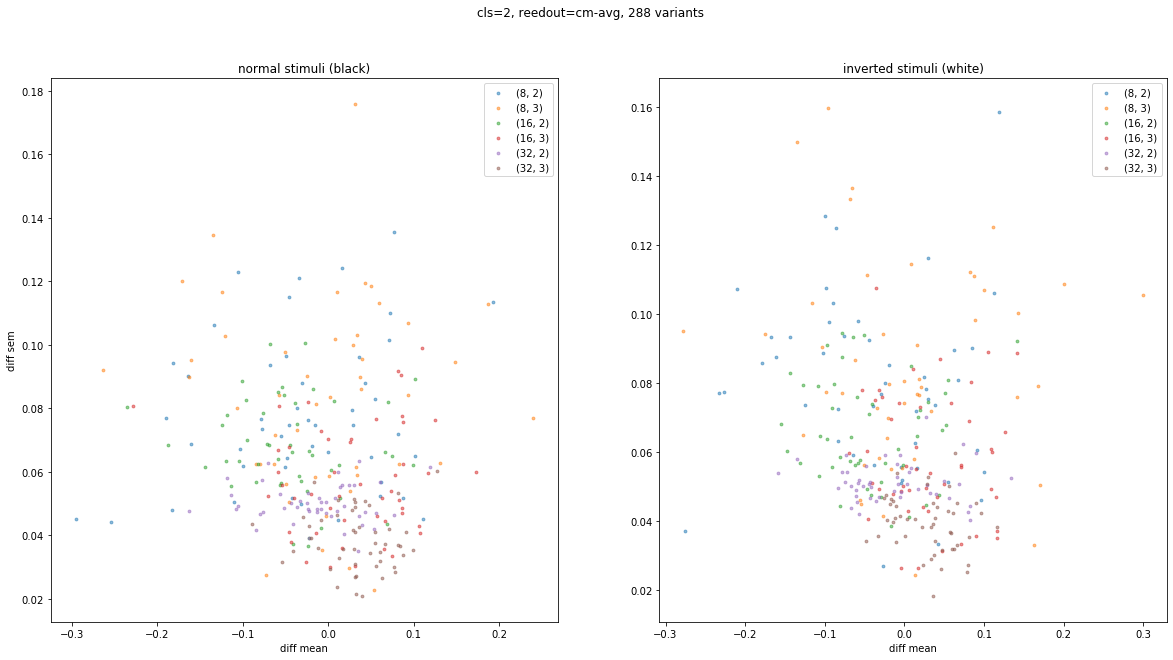

mean of mean over this readout -0.006505892213340412 mean of sem over this readout 0.06253061627125317
mean of mean over this readout, inverted -0.005714928443013222 mean of sem over this readout 0.06302960668053705


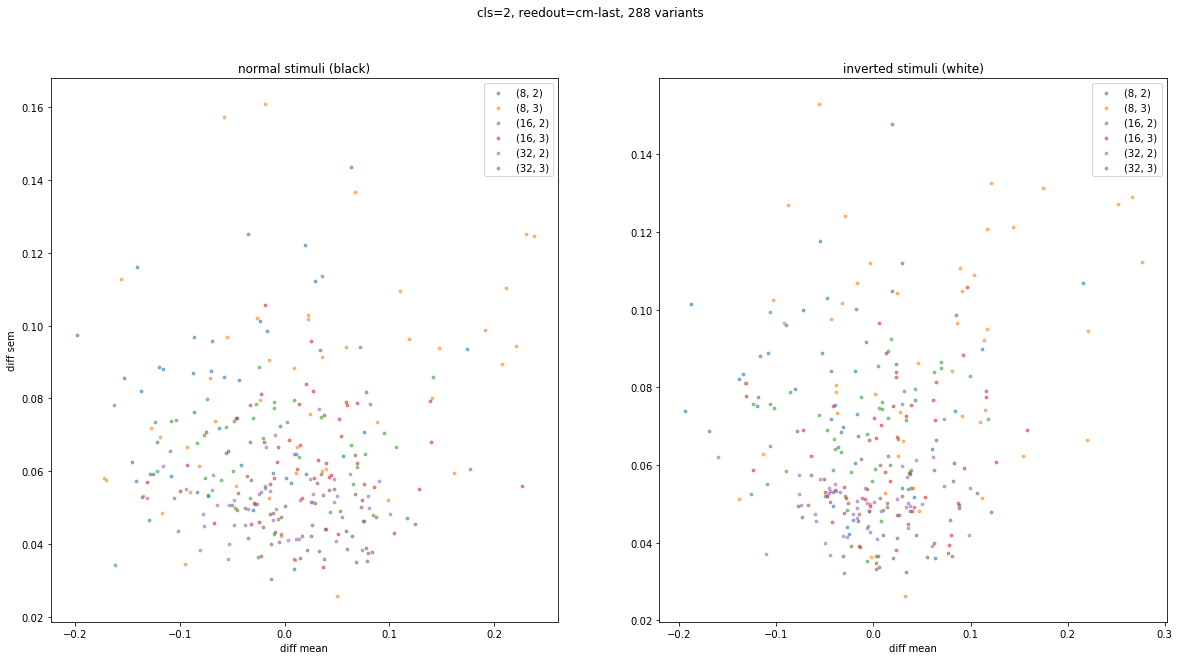

mean of mean over this readout -0.0010371279426102035 mean of sem over this readout 0.06422326302458406
mean of mean over this readout, inverted 0.005785822425073969 mean of sem over this readout 0.06596991826948845


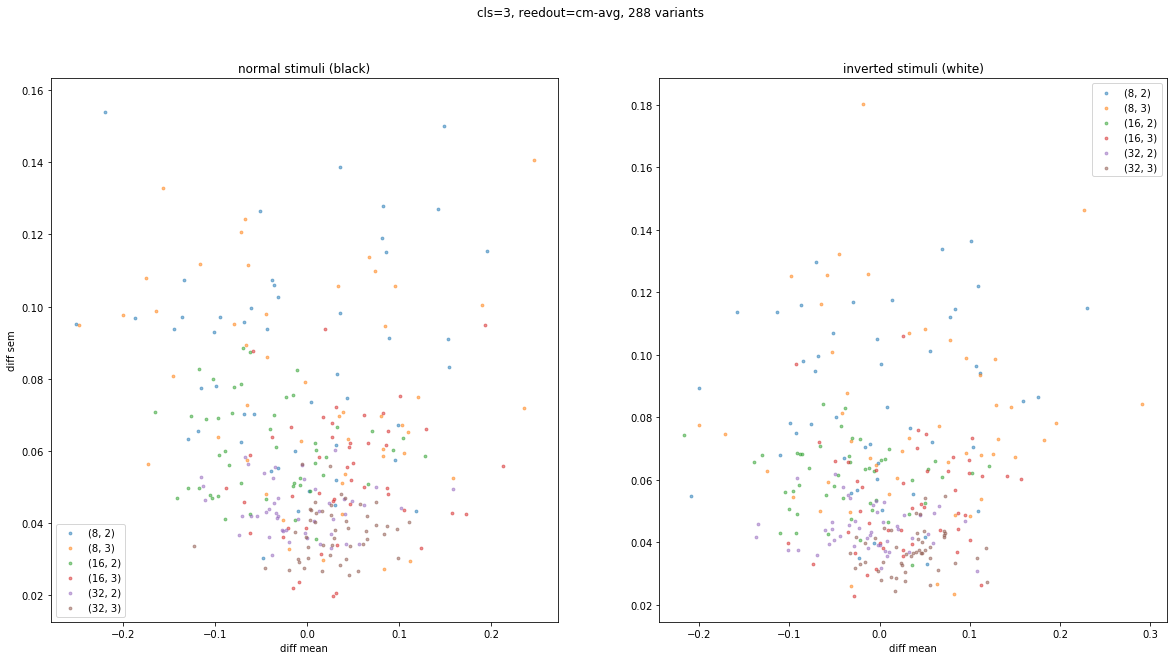

mean of mean over this readout 0.000986046291814155 mean of sem over this readout 0.059994189793563336
mean of mean over this readout, inverted 0.009255431827483894 mean of sem over this readout 0.060031863490420764


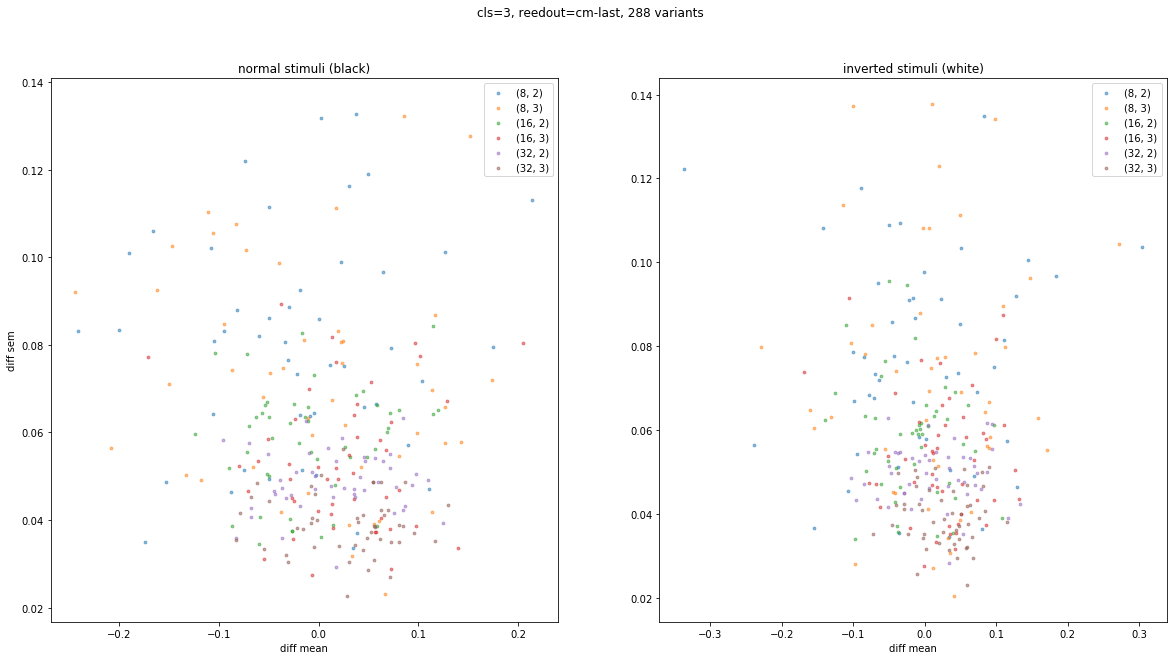

mean of mean over this readout 0.006244737292671068 mean of sem over this readout 0.05839691121340951
mean of mean over this readout, inverted 0.008858422597479734 mean of sem over this readout 0.05831918719283026


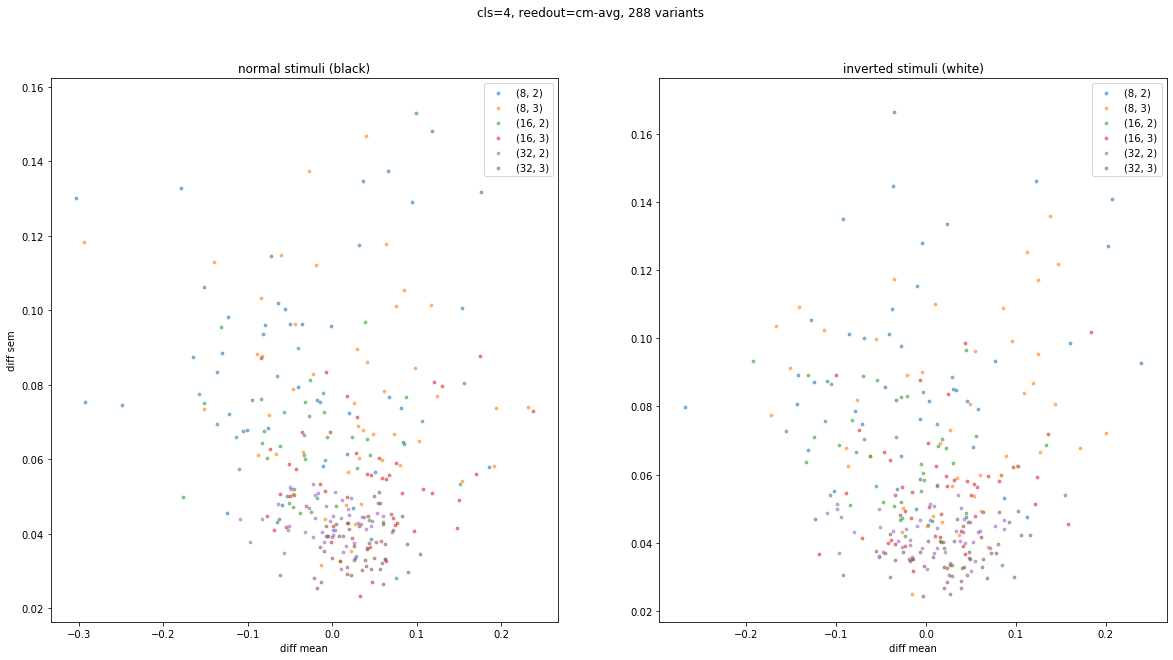

mean of mean over this readout 0.004388634838303255 mean of sem over this readout 0.059979890394112195
mean of mean over this readout, inverted 0.0064462960508093635 mean of sem over this readout 0.06053698222994657


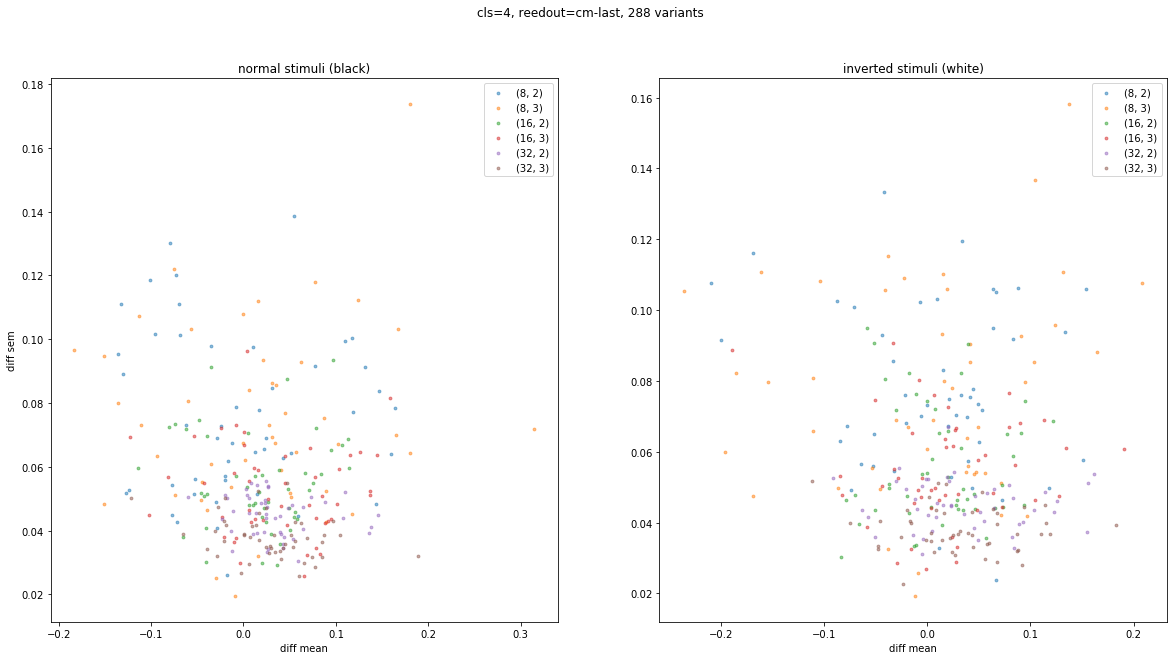

mean of mean over this readout 0.021390644309528098 mean of sem over this readout 0.05679470340488356
mean of mean over this readout, inverted 0.0175350733975667 mean of sem over this readout 0.05816966724148706


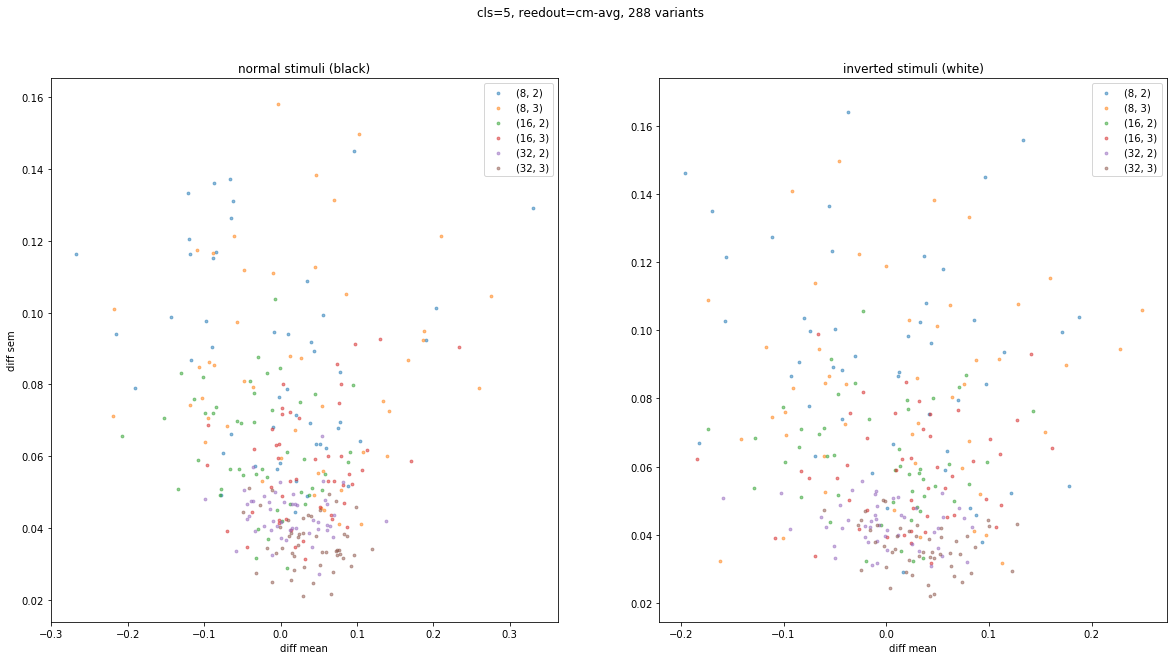

mean of mean over this readout 0.011779614659467681 mean of sem over this readout 0.062015962470298676
mean of mean over this readout, inverted 0.010810640895431455 mean of sem over this readout 0.0625008563372163


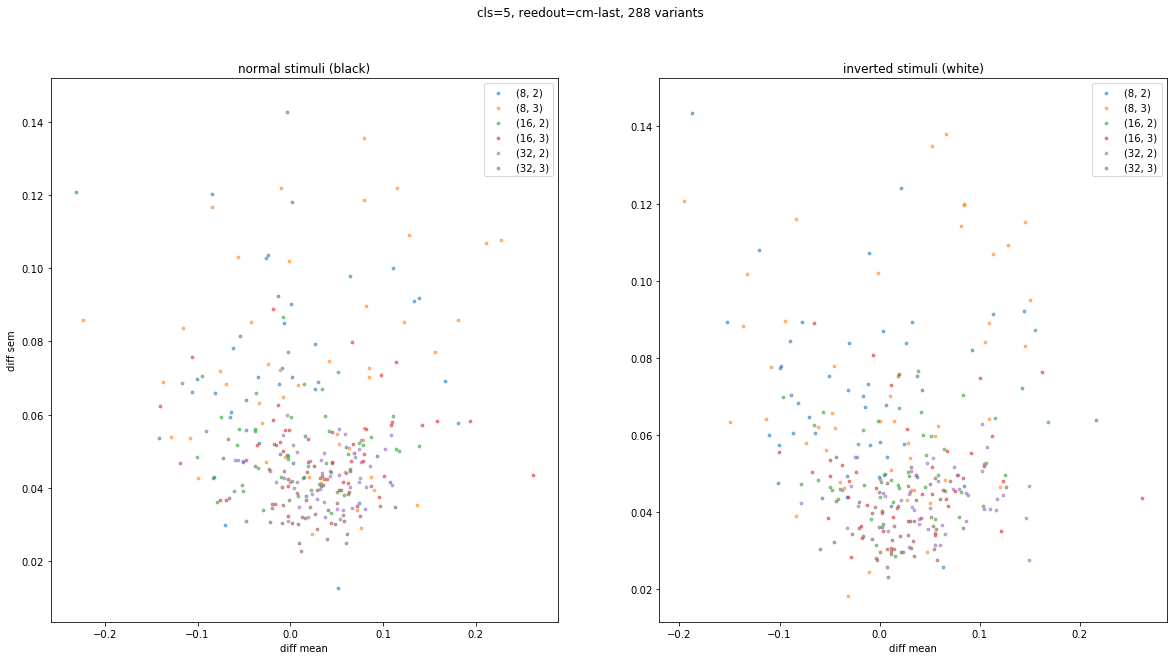

mean of mean over this readout 0.01999158992418446 mean of sem over this readout 0.05372576829362195
mean of mean over this readout, inverted 0.01979341223484133 mean of sem over this readout 0.05416176064039567


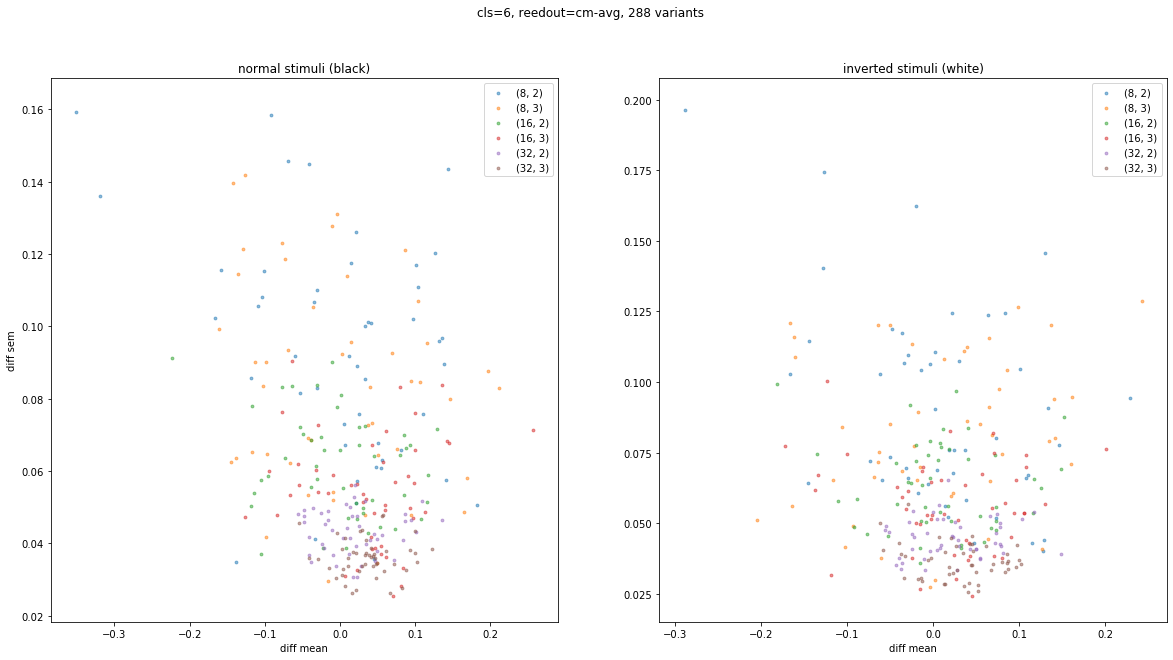

mean of mean over this readout 0.014448605304524345 mean of sem over this readout 0.0620590494884736
mean of mean over this readout, inverted 0.015576415677584407 mean of sem over this readout 0.06228076866454302


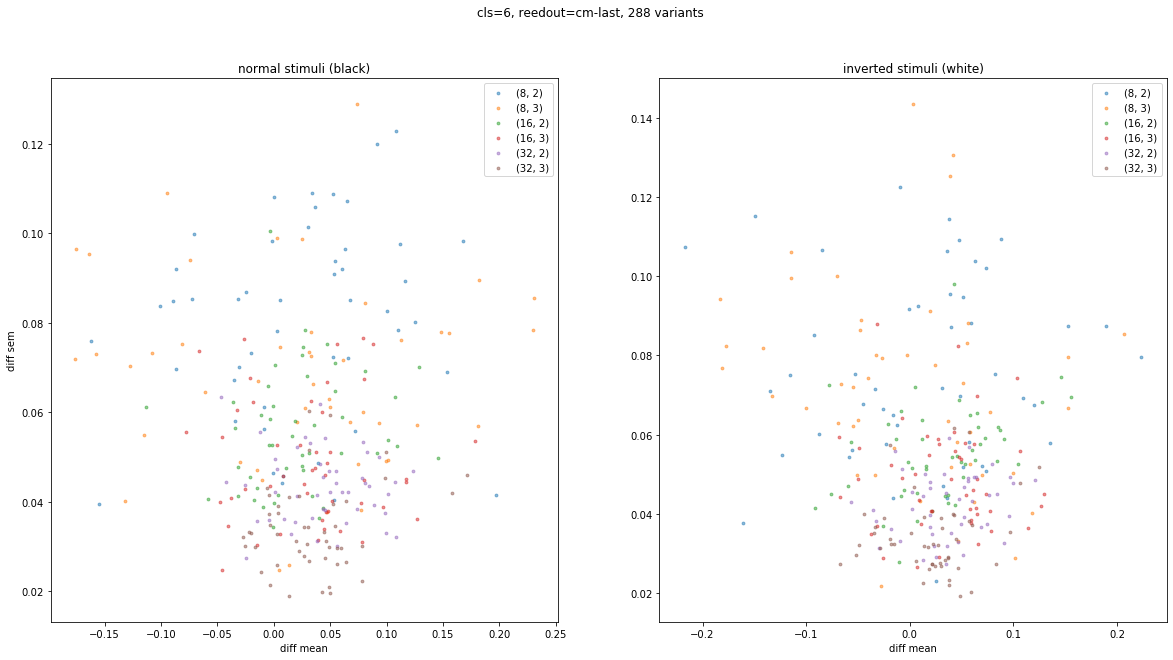

mean of mean over this readout 0.029096231497461964 mean of sem over this readout 0.05499771851159304
mean of mean over this readout, inverted 0.02110582031423794 mean of sem over this readout 0.05474261114733837


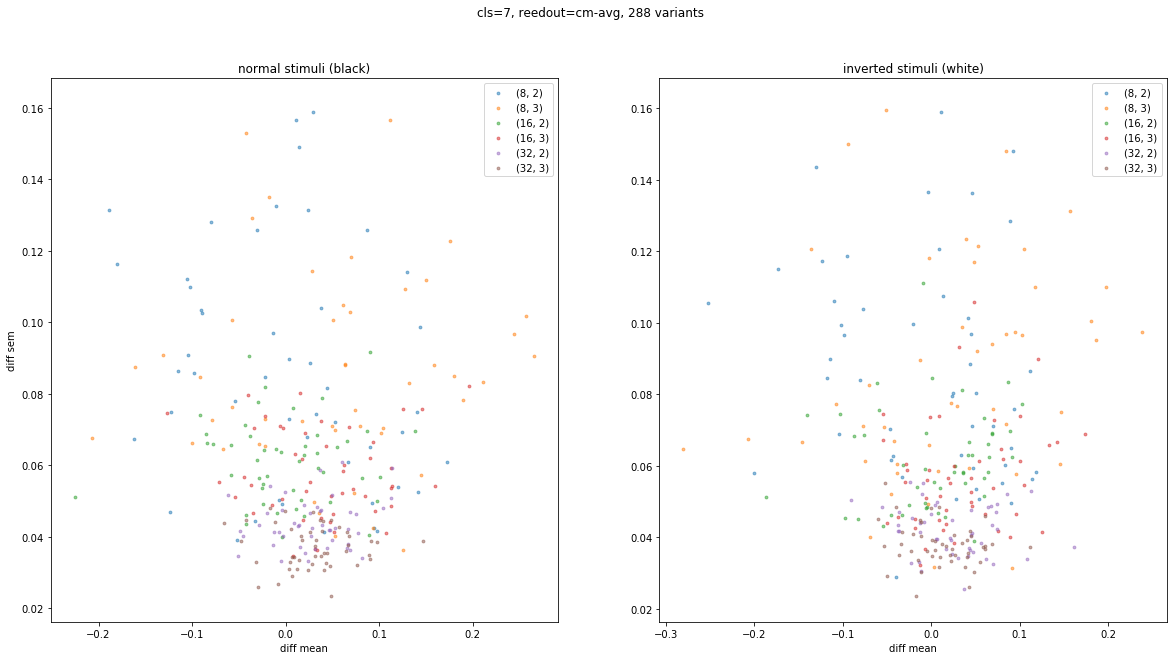

mean of mean over this readout 0.025220331332063584 mean of sem over this readout 0.06186610165323568
mean of mean over this readout, inverted 0.014780335527775905 mean of sem over this readout 0.06183903284817798


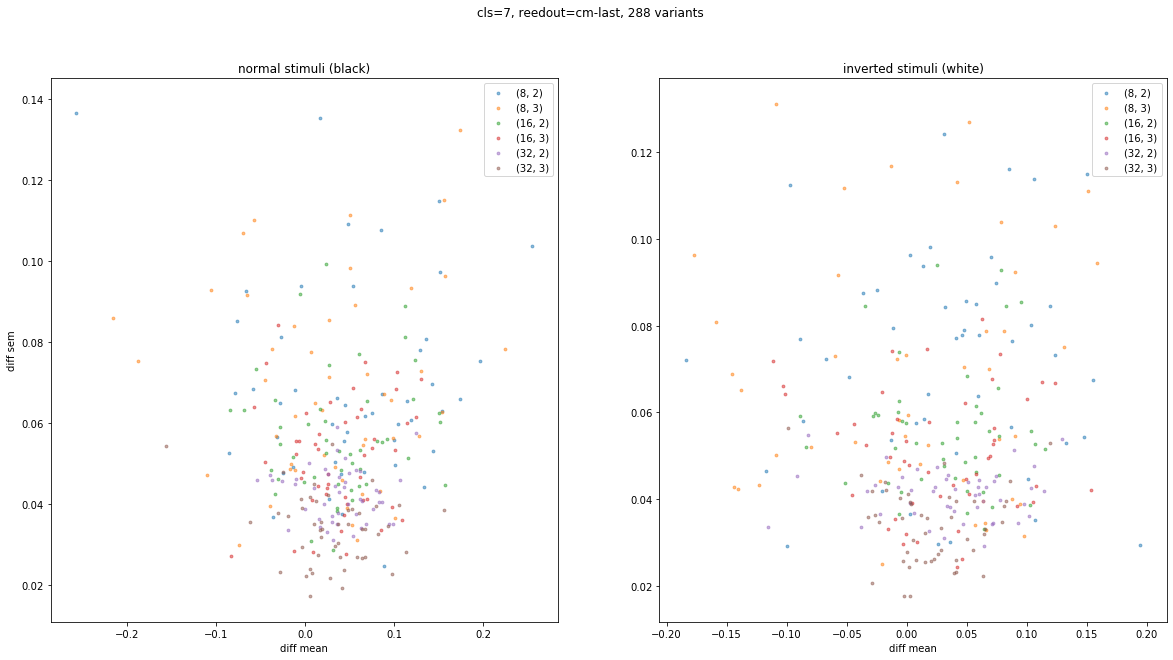

mean of mean over this readout 0.037391478584917745 mean of sem over this readout 0.05363988413164465
mean of mean over this readout, inverted 0.024979177031654653 mean of sem over this readout 0.05338718720998005


In [9]:
def show_scatter_plots():
    for cls in df_main_result.index.get_level_values('rcnn_bl_cls').unique():
        if cls == 1:
            continue
            
        df_this_main = df_main_result.xs(cls, level='rcnn_bl_cls')
        
        for readout_type in df_this_main.index.get_level_values('readout_type').unique():
            df_this_readout = df_this_main.xs(readout_type, level='readout_type')
            
            index_out_channel = df_this_readout.index.get_level_values('out_channel').values
            index_num_layer = df_this_readout.index.get_level_values('num_layer').values

            data_channel_layer = np.asarray([index_out_channel, index_num_layer]).T
            #     print(data_channel_layer.dtype, data_channel_layer.shape)
            unique_channel_layer = np.unique(data_channel_layer, axis=0).tolist()
        
            plt.close('all')
            fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
            axes = axes.ravel()
            
            for key_this in unique_channel_layer:
                key_this = tuple(key_this)
                (c_this, l_this) = key_this
                df_this = df_this_readout.xs(key=(c_this, l_this), level=('out_channel', 'num_layer'))
                assert len(df_this)*6 == len(df_this_readout)
                axes[0].scatter(
                    df_this['hal_tuning_mean'].values,
                    df_this['hal_tuning_sem'].values,
                    label=key_this,
                    alpha=0.5,
                    s=8
                )
                
                axes[1].scatter(
                    df_this['hal_tuning_mean_inv'].values,
                    df_this['hal_tuning_sem_inv'].values,
                    label=key_this,
                    alpha=0.5,
                    s=8
                )
            
            axes[0].legend(loc='best')
            axes[1].legend(loc='best')
            fig.suptitle(f'cls={cls}, reedout={readout_type}, {len(df_this_readout)} variants')
            axes[0].set_title('normal stimuli (black)')
            axes[1].set_title('inverted stimuli (white)')
            
            axes[0].set_xlabel('diff mean')
            axes[1].set_xlabel('diff mean')
            axes[0].set_ylabel('diff sem')
            plt.show()
        
            print('mean of mean over this readout', df_this_readout['hal_tuning_mean'].mean(), 'mean of sem over this readout', df_this_readout['hal_tuning_sem'].mean())
            print('mean of mean over this readout, inverted', df_this_readout['hal_tuning_mean_inv'].mean(), 'mean of sem over this readout', df_this_readout['hal_tuning_sem_inv'].mean())
show_scatter_plots()